In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from tqdm import tqdm

# 1 Introduction
## 1.1 Songs

In [4]:
songs = pd.read_csv("data/songs.csv")
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [5]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071348
lyricist       1945243
language             1
dtype: int64

### 1.1.i Artist names

In [6]:
artists_occurence = songs.artist_name.value_counts()

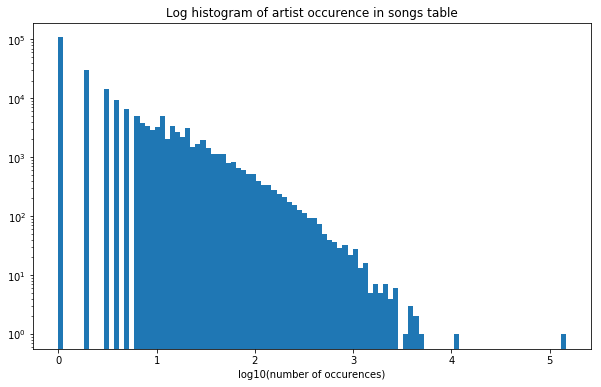

In [7]:
plt.hist(np.log10(artists_occurence), bins=100)
plt.yscale('log')
plt.title('Log histogram of artist occurence in songs table')
plt.xlabel('log10(number of occurences)')
plt.show()

#### Manage artist collaborations ?

There are $>10^5$ unique artists names in the dataset. It may be an inflated number as artist collaborations count as unique strings.

In [23]:
songs['split_artist_name'] = [re.split('\||,|\/', artist_name) for artist_name in songs.artist_name]
songs['number_of_artists'] = songs['split_artist_name'].str.len()

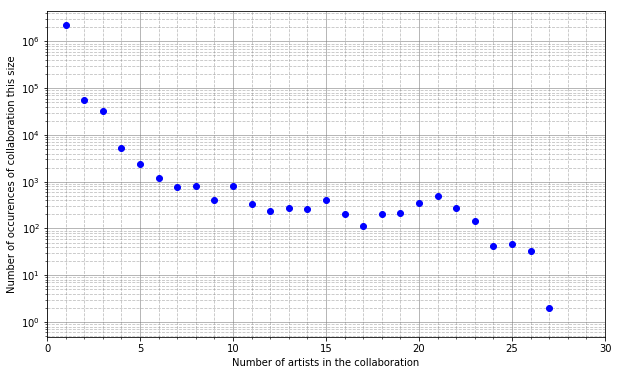

In [114]:
collaborations = (np.unique(songs.number_of_artists, return_counts=True))

plt.plot(collaborations[0], collaborations[1], 'bo')
plt.xlim([0,30])
plt.yscale('log')
plt.xlabel("Number of artists in the collaboration")
plt.ylabel("Number of occurences of collaboration this size")
plt.minorticks_on()
plt.grid(b=True, which='major', color='grey', linestyle='-', alpha=0.7)
plt.grid(b=True, which='minor', color='grey', linestyle='--', alpha=0.5)
plt.show()

In [9]:
len(songs[(songs.number_of_artists > 1)])

102846

We find that there are $10^5$ songs ($4.5\%$ of the database) which have multiple artists.

Let's do the same for the genres and split them.

In [10]:
songs['split_genre_ids'] = [re.split('\|', str(genre_id)) for genre_id in songs.genre_ids]

In [124]:
genres_multiple_artists = [genre for sublist in songs[songs.number_of_artists > 2]['split_genre_ids']
                           for genre in sublist]

count = []
genres = pd.Series(genres_multiple_artists).value_counts().index
for genre in genres:
    count.append(100*len(songs[([genre in row for row in songs.split_genre_ids]) & 
                               (songs.number_of_artists > 2)]) / 
                 len(songs[[genre in row for row in songs.split_genre_ids]]))

relative_count = pd.DataFrame({'relative_count' : count}, genres)

In [125]:
genres_multiple_artists = relative_count.join(pd.Series(genres_multiple_artists,name="raw_count").value_counts())

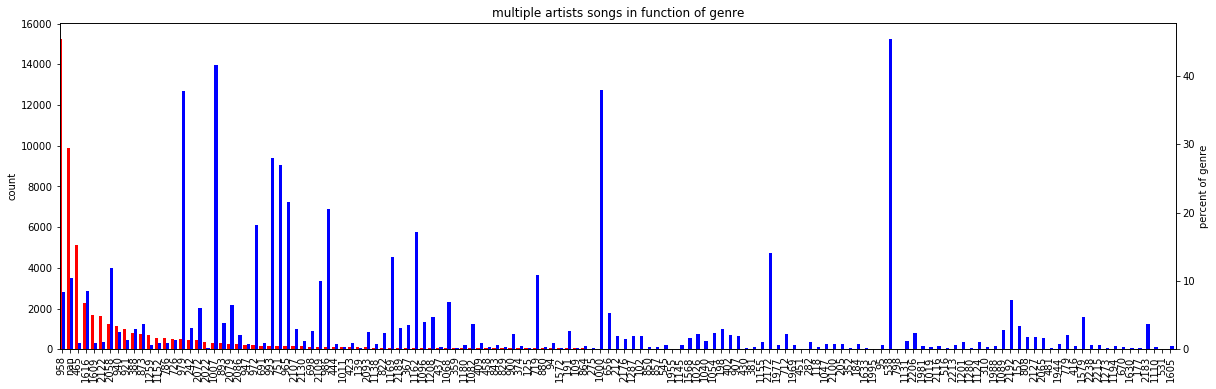

In [137]:
fig = plt.figure(figsize=[20,6]) # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

genres_multiple_artists.raw_count.plot(kind='bar', color='red', ax=ax, width=width, position=1)
genres_multiple_artists.relative_count.plot(kind='bar', color='blue', ax=ax2, width=width, position=0)

ax.set_ylabel('count')
ax2.set_ylabel('percent of genre')

plt.title('multiple artists songs in function of genre')

plt.show()

Among the top genres, 465 seem to correspond to classical or instrumental music.

In [159]:
unique_artists = np.unique([artist for sublist in songs.split_artist_name for artist in sublist]) 
artist_count = [] 
 
for artist in tqdm(unique_artists):
    artist_count.append(len(songs[[artist in row for row in songs.split_artist_name]])) 

  0%|          | 143/241598 [00:54<25:16:56,  2.65it/s]

KeyboardInterrupt: 

In [ ]:
artist_count = pd.DataFrame(artist_count, unique_artists)

In [ ]:
plt.hist(np.log10(artist_count[0]), bins=100)
plt.title('Log histogram of artist occurence in songs table')
plt.xlabel('log10(number of occurences)')
plt.show()

### 1.1.ii Genres

In [9]:
genres_occurence = songs.genre_ids.value_counts()

In [139]:
songs

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,split_artist_name,number_of_artists,split_genre_ids
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,[張信哲 (Jeff Chang)],1,[465]
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,[BLACKPINK],1,[444]
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,[SUPER JUNIOR],1,[465]
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,[S.H.E],1,[465]
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,[貴族精選],1,[726]
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0,[貴族精選],1,"[864, 857, 850, 843]"
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0,[伍佰 & China Blue],1,[458]
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0,[光良 (Michael Wong)],1,[465]
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0,[林俊傑 (JJ Lin)],1,[465]
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0,[Kodaline],1,"[352, 1995]"


In [148]:
unique_genres = np.unique([genre for sublist in songs.split_genre_ids for genre in sublist])
genre_count = []

for genre in unique_genres:
    genre_count.append(len(songs[[genre in row for row in songs.split_genre_ids]]))

In [149]:
genre_count = pd.DataFrame(genre_count, unique_genres)

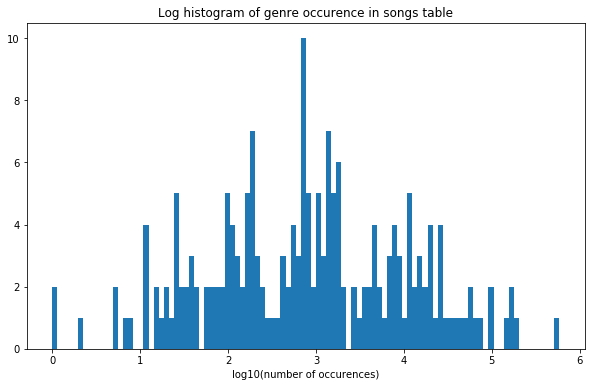

In [155]:
plt.hist(np.log10(genre_count[0]), bins=100)
plt.title('Log histogram of genre occurence in songs table')
plt.xlabel('log10(number of occurences)')
plt.show()

## Members

## Train

In [4]:
train = pd.read_csv('data/train.csv')

In [5]:
train

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [6]:
train.isnull().sum()

msno                       0
song_id                    0
source_system_tab      18371
source_screen_name    414804
source_type            21539
target                     0
dtype: int64

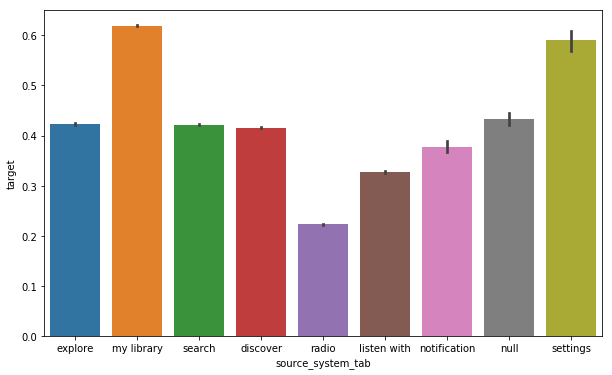

In [5]:
sns.barplot(x='source_system_tab', y='target', data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

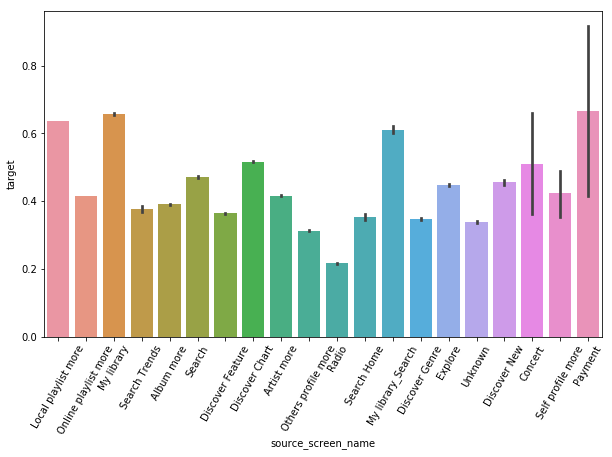

In [49]:
sns.barplot(x='source_screen_name', y='target', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

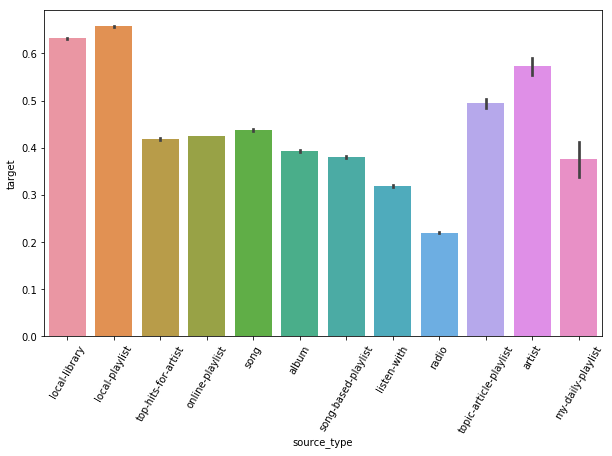

In [50]:
sns.barplot(x='source_type', y='target', data=train)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

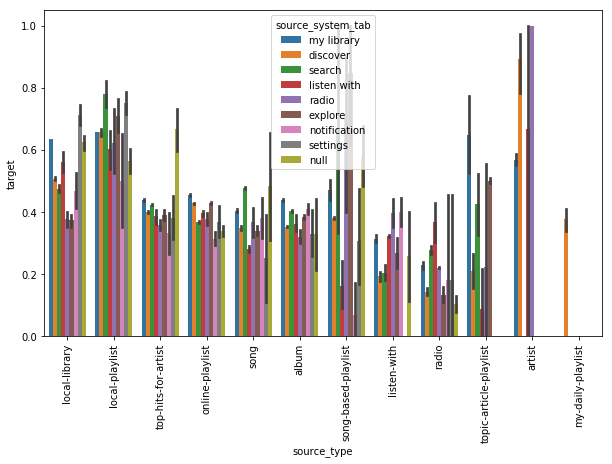

In [56]:
sns.barplot(x='source_type', y='target', hue='source_system_tab', data=train)
plt.xticks(rotation=90)

In [10]:
train.sort_values('msno', inplace=True)
train.reset_index(drop=True, inplace=True)

In [13]:
unique_users = train['msno'].unique()
unique_users_target_means = np.zeros(len(unique_users))
unique_users_n_songs = np.zeros(len(unique_users))

for i, unique_user in tqdm(enumerate(unique_users)):
    start_index = train['msno'].searchsorted(unique_users[i])[0]
    if not i == (len(unique_users)-1):
        stop_index = train['msno'].searchsorted(unique_users[i+1])[0]
    else:
        stop_index = len(train)
    unique_users_target_means[i] = train.iloc[start_index:stop_index]['target'].mean()
    unique_users_n_songs[i] = stop_index - start_index

30755it [00:12, 2396.22it/s]


In [23]:
g = (sns.jointplot(np.log10(unique_users_n_songs[(unique_users_target_means != 0) & (unique_users_target_means != 1)]), 
                   unique_users_target_means[(unique_users_target_means != 0) & (unique_users_target_means != 1)], kind="hex", color='b')
     .set_axis_labels('log10 Number of songs for user', 'mean target value'))

NameError: name 'unique_users_n_songs' is not defined

In [7]:
train.sort_values('song_id', inplace=True)
train.reset_index(drop=True, inplace=True)

In [8]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,UK7HQJngD71i6BasobiKBbhBylFXWP4Kj6K7dVV4B0w=,+++2AEoM0d8iZTdbnAjUm35bnGKGMXdZJSv4rrWK6JQ=,discover,NaN,online-playlist,0
1,jCkFTmE17pwgG5sjl7wSB+ah+RXYtYRMIlPUalskk1s=,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,discover,Online playlist more,song-based-playlist,0
2,+5Z+tu8NySwd9J0mACPZTk/lcPYB1WgUp8ogKwocFXw=,++/ACCkEN/+VtgrJxEqeRgRmV4y8pcarDJ9T/yRAi1E=,discover,Online playlist more,online-playlist,0
3,a2oBK7WEXWXSi+QWITA+v1zZ1iSMLB8hVvNQFCCS2XU=,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,discover,Album more,album,0
4,NwX1NaVlyw0jvfQNxLTcx9ztIUKVL/sjkccdAmMpfCA=,++/lJNswCU+za2pYB0cWIbGL5UzWIKtfweX20+GImZA=,my library,Local playlist more,local-playlist,0


In [17]:
unique_songs = train['song_id'].unique()
unique_songs_target_means = np.zeros(len(unique_songs))
unique_songs_n_users = np.zeros(len(unique_songs))

for i, unique_song in tqdm(enumerate(unique_songs)):
    start_index = train['song_id'].searchsorted(unique_songs[i])[0]
    if not i == (len(unique_songs)-1):
        stop_index = train['song_id'].searchsorted(unique_songs[i+1])[0]
    else:
        stop_index = len(train)
    unique_songs_target_means[i] = train.iloc[start_index:stop_index]['target'].mean()
    unique_songs_n_users[i] = stop_index - start_index

359966it [02:58, 2011.39it/s]


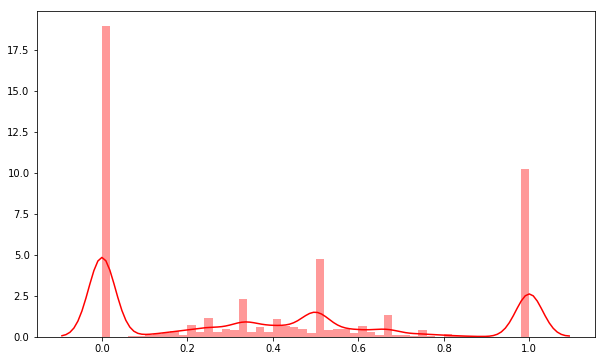

In [29]:
sns.distplot(unique_songs_target_means, color='r')

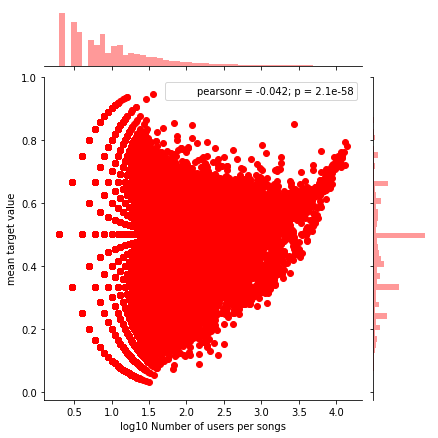

In [30]:
g = (sns.jointplot(np.log10(unique_songs_n_users[(unique_songs_target_means != 0) & (unique_songs_target_means != 1)]), 
                   unique_songs_target_means[(unique_songs_target_means != 0) & (unique_songs_target_means != 1)], color='r')
     .set_axis_labels('log10 Number of users per songs', 'mean target value'))